In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca dataset dari file CSV
df = pd.read_csv("newDataBaseVk.csv")

In [ ]:
df

# Data Analysis

In [4]:
# Menampilkan informasi ringkasan dataset
print("Informasi ringkasan dataset:")
print(df.info())

Informasi ringkasan dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 998 non-null    int64
 1   countFriends       998 non-null    int64
 2   countFollowers     998 non-null    int64
 3   boolComments       998 non-null    bool 
 4   countOwnerPosts    998 non-null    int64
 5   countOwnerReposts  998 non-null    int64
 6   countPhotos        998 non-null    int64
 7   countVideos        998 non-null    int64
 8   countLikesPhotoes  998 non-null    int64
 9   sex                998 non-null    int64
dtypes: bool(1), int64(9)
memory usage: 71.3 KB
None


In [5]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
                 ID  countFriends  countFollowers  countOwnerPosts  \
count  9.980000e+02    998.000000      998.000000       998.000000   
mean   1.853378e+08   1459.549098      807.098196         9.320641   
std    1.318300e+08   2241.602534     2926.420603         7.193374   
min    1.626720e+05      2.000000        0.000000         0.000000   
25%    8.193883e+07    201.250000       85.250000         2.000000   
50%    1.610586e+08    421.500000      233.000000         8.000000   
75%    2.684633e+08   1602.500000      549.750000        17.000000   
max    5.509817e+08   9998.000000    57037.000000        20.000000   

       countOwnerReposts  countPhotos  countVideos  countLikesPhotoes  \
count         998.000000   998.000000   998.000000         998.000000   
mean            6.146293    16.692385   361.575150        1443.033066   
std             6.549299    28.669853   750.217754        3645.569151   
min             0.000000     0.000000     0.000000    

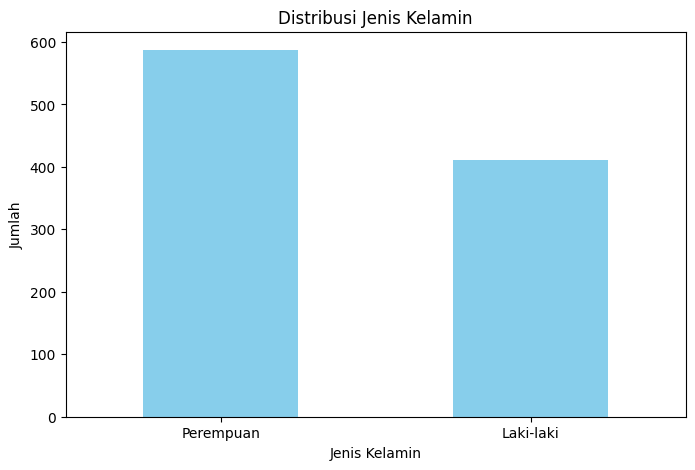

In [6]:
# Visualisasi distribusi data
plt.figure(figsize=(8, 5))
df['sex'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Perempuan', 'Laki-laki'], rotation=0)
plt.show()

In [7]:
# Korelasi antara variabel numerik
correlation = df.corr()
print("\nKorelasi antara variabel numerik:")
print(correlation)


Korelasi antara variabel numerik:
                         ID  countFriends  countFollowers  boolComments  \
ID                 1.000000     -0.145982       -0.150731      0.015573   
countFriends      -0.145982      1.000000        0.399597      0.131623   
countFollowers    -0.150731      0.399597        1.000000      0.089433   
boolComments       0.015573      0.131623        0.089433      1.000000   
countOwnerPosts   -0.188287      0.336432        0.195181      0.253939   
countOwnerReposts -0.004164     -0.023870       -0.098498      0.002746   
countPhotos       -0.254707      0.152037        0.106904      0.038951   
countVideos       -0.056733      0.019589        0.029695     -0.015970   
countLikesPhotoes -0.157161      0.358169        0.396614      0.037133   
sex                0.021655      0.116524        0.042562      0.045979   

                   countOwnerPosts  countOwnerReposts  countPhotos  \
ID                       -0.188287          -0.004164    -0.254707   

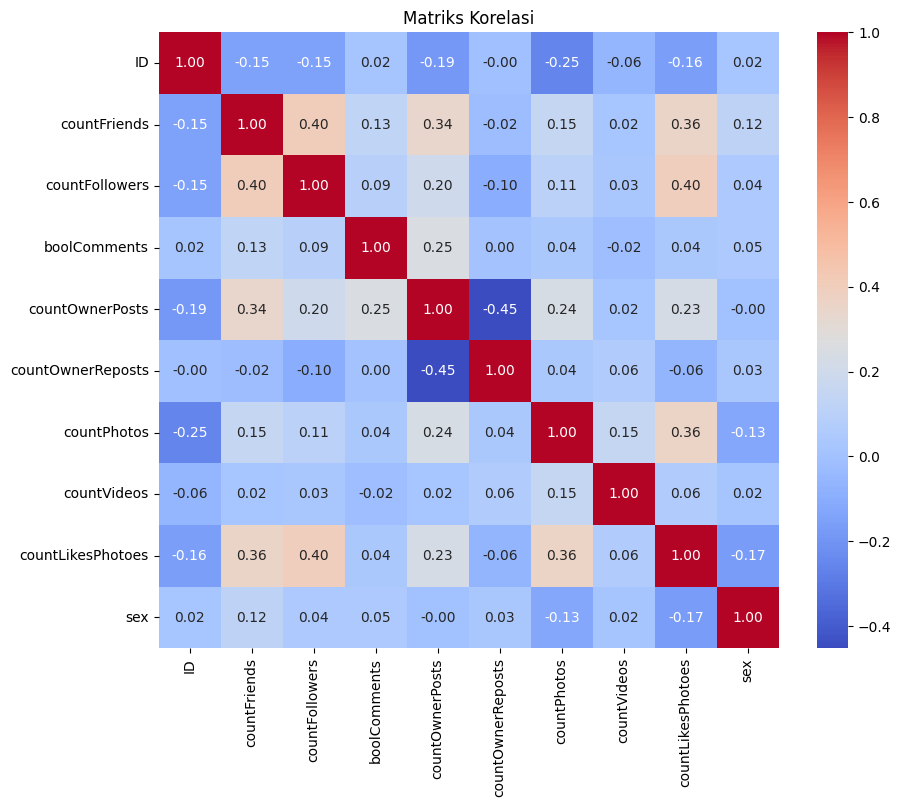

In [8]:
# Menampilkan matriks korelasi sebagai heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

# Analisis Jaringan

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
# Membuat objek Graph dari NetworkX
G = nx.Graph()

In [11]:
G

In [12]:
# Menambahkan edge ke Graph berdasarkan koneksi antara pengguna
for index, row in df.iterrows():
    G.add_edge(row['ID'], row['countFriends'])

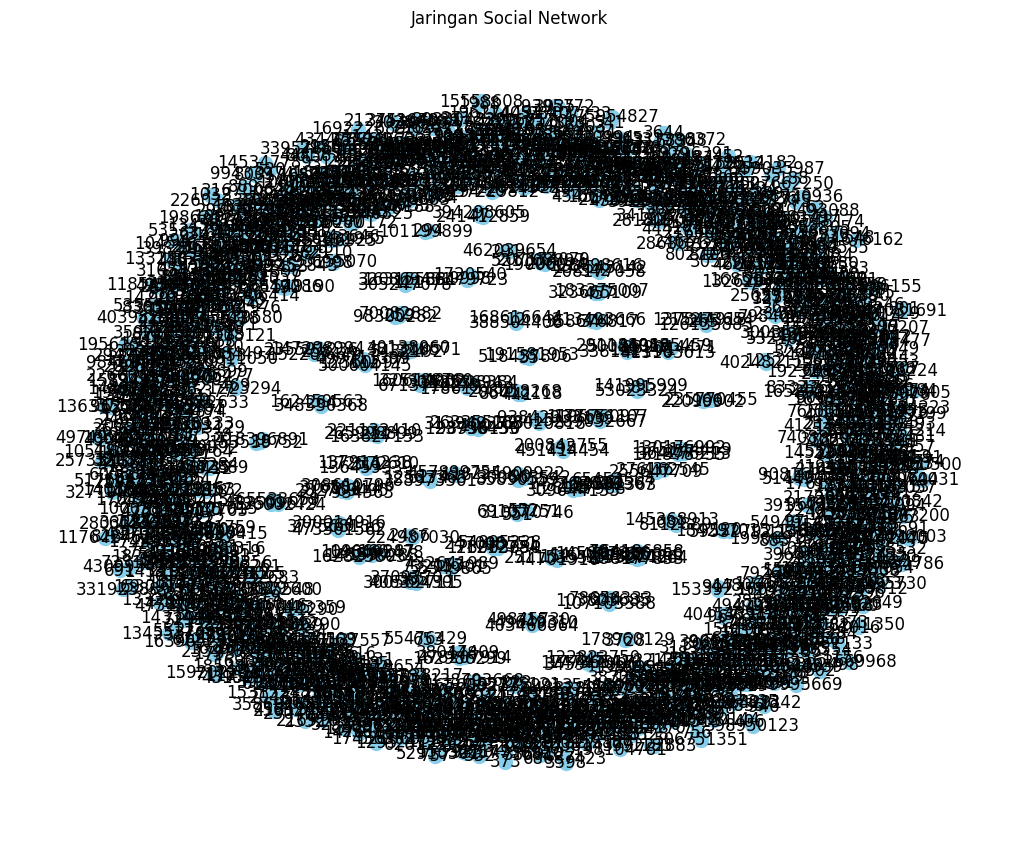

In [13]:
# Visualisasi jaringan
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color='gray')
plt.title('Jaringan Social Network')
plt.show()

In [15]:
# Analisis sederhana
print("Informasi jaringan:")
print("Jumlah node:", G.number_of_nodes())
print("Jumlah edge:", G.number_of_edges())
print("Rata-rata derajat:", sum(dict(G.degree()).values()) / len(G))
print("Komponen terhubung:", nx.number_connected_components(G))

Informasi jaringan:
Jumlah node: 1716
Jumlah edge: 972
Rata-rata derajat: 1.132867132867133
Komponen terhubung: 744


In [16]:
# Menghitung diameter komponen terbesar
largest_component = max(nx.connected_components(G), key=len)
diameter = nx.diameter(G.subgraph(largest_component))
print("Diameter komponen terbesar:", diameter)

Diameter komponen terbesar: 4


In [17]:
import seaborn as sns

In [18]:
# Centralitas
print("\nCentralitas:")
degree_centrality = nx.degree_centrality(G)
print("Derajat Sentralitas:", degree_centrality)


Centralitas:
Derajat Sentralitas: {3329071: 0.0005830903790087463, 75: 0.0005830903790087463, 5138784: 0.0005830903790087463, 173: 0.0011661807580174927, 5432192: 0.0005830903790087463, 324: 0.001749271137026239, 7245154: 0.0005830903790087463, 678: 0.0005830903790087463, 8648939: 0.0005830903790087463, 398: 0.0005830903790087463, 9732431: 0.0005830903790087463, 326: 0.0005830903790087463, 12360597: 0.0005830903790087463, 112: 0.001749271137026239, 13275302: 0.0005830903790087463, 1008: 0.0005830903790087463, 15016631: 0.0005830903790087463, 748: 0.0005830903790087463, 16286011: 0.0005830903790087463, 4690: 0.0005830903790087463, 17395369: 0.0005830903790087463, 2394: 0.0005830903790087463, 17429194: 0.0005830903790087463, 134: 0.0005830903790087463, 21200149: 0.0005830903790087463, 214: 0.001749271137026239, 21212784: 0.0005830903790087463, 95: 0.0023323615160349854, 22099902: 0.0005830903790087463, 166: 0.0011661807580174927, 25749180: 0.0005830903790087463, 22: 0.000583090379008746

In [19]:
# Komunitas Detection
print("\nKomunitas Detection:")
communities = list(nx.community.greedy_modularity_communities(G))
print("Komunitas:", communities)


Komunitas Detection:
Komunitas: [frozenset({160, 145570288, 146495478, 162823803, 109066287, 159}), frozenset({153274864, 19065060, 88, 164186858, 187862124, 198177853}), frozenset({152049600, 98368805, 132631846, 175285733, 111}), frozenset({130176992, 257, 175144469, 364276213, 181978955}), frozenset({21212784, 178063650, 247008551, 54895338, 95}), frozenset({96382388, 160802518, 227495609, 255079562, 189}), frozenset({217934563, 282769495, 158, 308610796, 37650414}), frozenset({123798433, 100, 98936150, 313949372, 263355183}), frozenset({177365410, 345944996, 245, 122823750, 174747017}), frozenset({466631745, 264387364, 262944005, 216, 293396683}), frozenset({107103388, 103803685, 244, 78656333}), frozenset({65452504, 50582363, 261, 134090567}), frozenset({67745560, 50650761, 523, 165337167}), frozenset({229242676, 205, 229464974, 91932951}), frozenset({243828097, 237, 157782958, 124056247}), frozenset({265998899, 163827153, 221132410, 211}), frozenset({287824874, 282, 238315787, 1

In [ ]:
# Pengaruh dan Penyebaran
print("\nPengaruh dan Penyebaran:")
# (Contoh: Pengaruh dan penyebaran bisa menjadi topik analisis yang lebih kompleks,
# seperti analisis penyebaran virus menggunakan model SIR atau model lainnya.)

Mengubah ke directed graph

In [23]:
# Membuat graf berarah dari graf tak berarah
G_directed = G.to_directed()

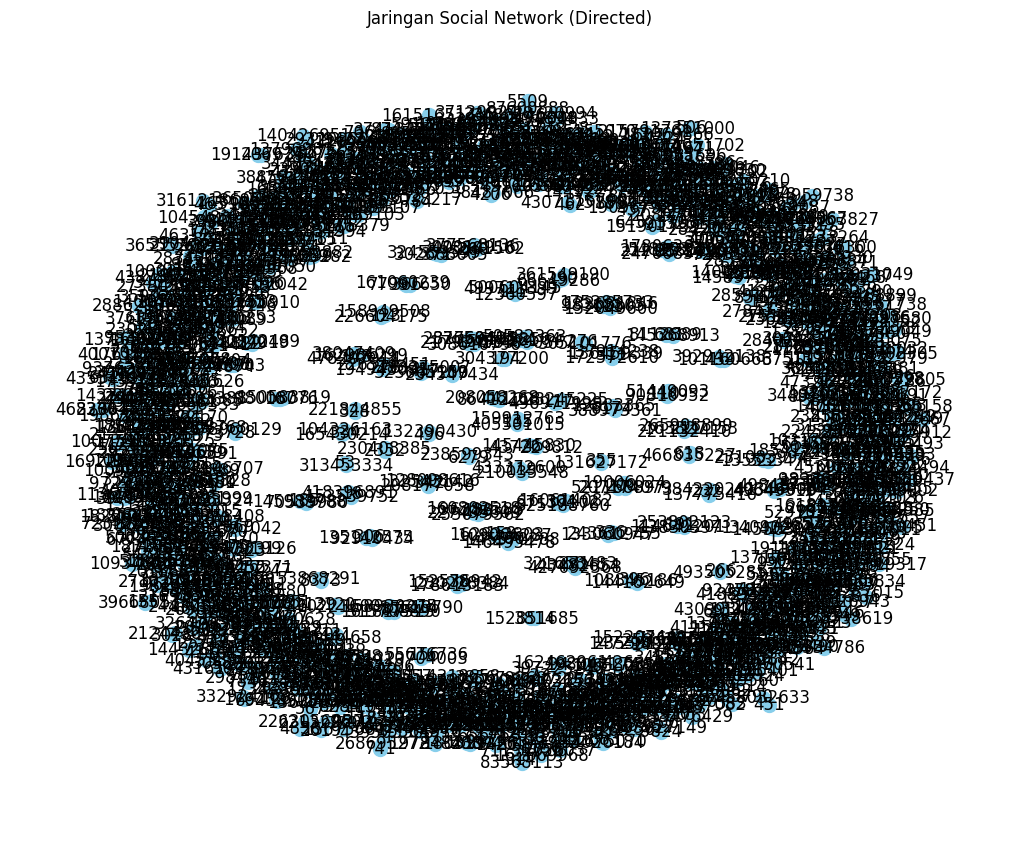

In [24]:
# Visualisasi jaringan
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_directed)
nx.draw(G_directed, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color='gray', arrows=True)
plt.title('Jaringan Social Network (Directed)')
plt.show()

In [25]:
# Analisis sederhana
print("Informasi jaringan:")
print("Jumlah node:", G_directed.number_of_nodes())
print("Jumlah edge:", G_directed.number_of_edges())
print("Rata-rata derajat:", sum(dict(G_directed.degree()).values()) / len(G_directed))
print("Komponen terhubung:", nx.number_weakly_connected_components(G_directed))

Informasi jaringan:
Jumlah node: 1716
Jumlah edge: 1944
Rata-rata derajat: 2.265734265734266
Komponen terhubung: 744


In [26]:
# Menghitung diameter komponen terbesar
largest_component = max(nx.weakly_connected_components(G_directed), key=len)
diameter = nx.diameter(G_directed.subgraph(largest_component))
print("Diameter komponen terbesar:", diameter)

Diameter komponen terbesar: 4


In [27]:
# Centralitas
print("\nCentralitas:")
in_degree_centrality = nx.in_degree_centrality(G_directed)
out_degree_centrality = nx.out_degree_centrality(G_directed)
print("In-Degree Sentralitas:", in_degree_centrality)
print("Out-Degree Sentralitas:", out_degree_centrality)


Centralitas:
In-Degree Sentralitas: {3329071: 0.0005830903790087463, 75: 0.0005830903790087463, 5138784: 0.0005830903790087463, 173: 0.0011661807580174927, 5432192: 0.0005830903790087463, 324: 0.001749271137026239, 7245154: 0.0005830903790087463, 678: 0.0005830903790087463, 8648939: 0.0005830903790087463, 398: 0.0005830903790087463, 9732431: 0.0005830903790087463, 326: 0.0005830903790087463, 12360597: 0.0005830903790087463, 112: 0.001749271137026239, 13275302: 0.0005830903790087463, 1008: 0.0005830903790087463, 15016631: 0.0005830903790087463, 748: 0.0005830903790087463, 16286011: 0.0005830903790087463, 4690: 0.0005830903790087463, 17395369: 0.0005830903790087463, 2394: 0.0005830903790087463, 17429194: 0.0005830903790087463, 134: 0.0005830903790087463, 21200149: 0.0005830903790087463, 214: 0.001749271137026239, 21212784: 0.0005830903790087463, 95: 0.0023323615160349854, 22099902: 0.0005830903790087463, 166: 0.0011661807580174927, 25749180: 0.0005830903790087463, 22: 0.0005830903790087

In [28]:
# Komunitas Detection
print("\nKomunitas Detection:")
communities = list(nx.community.greedy_modularity_communities(G_directed))
print("Komunitas:", communities)


Komunitas Detection:
Komunitas: [frozenset({160, 145570288, 146495478, 162823803, 109066287, 159}), frozenset({153274864, 19065060, 88, 164186858, 187862124, 198177853}), frozenset({152049600, 98368805, 132631846, 175285733, 111}), frozenset({130176992, 257, 175144469, 364276213, 181978955}), frozenset({21212784, 178063650, 247008551, 54895338, 95}), frozenset({96382388, 160802518, 227495609, 255079562, 189}), frozenset({217934563, 282769495, 158, 308610796, 37650414}), frozenset({123798433, 100, 98936150, 313949372, 263355183}), frozenset({177365410, 345944996, 245, 122823750, 174747017}), frozenset({466631745, 264387364, 262944005, 216, 293396683}), frozenset({107103388, 103803685, 244, 78656333}), frozenset({65452504, 50582363, 261, 134090567}), frozenset({67745560, 50650761, 523, 165337167}), frozenset({229242676, 205, 229464974, 91932951}), frozenset({243828097, 237, 157782958, 124056247}), frozenset({265998899, 163827153, 221132410, 211}), frozenset({287824874, 282, 238315787, 1

In [29]:
# Kepatuhan Struktural
print("\nKepatuhan Struktural:")
triads = nx.triadic_census(G_directed)
print("Triads:", triads)


Kepatuhan Struktural:
Triads: {'003': 839034150, '012': 0, '102': 1665412, '021D': 0, '021U': 0, '021C': 0, '111D': 0, '111U': 0, '030T': 0, '030C': 0, '201': 298, '120D': 0, '120U': 0, '120C': 0, '210': 0, '300': 0}


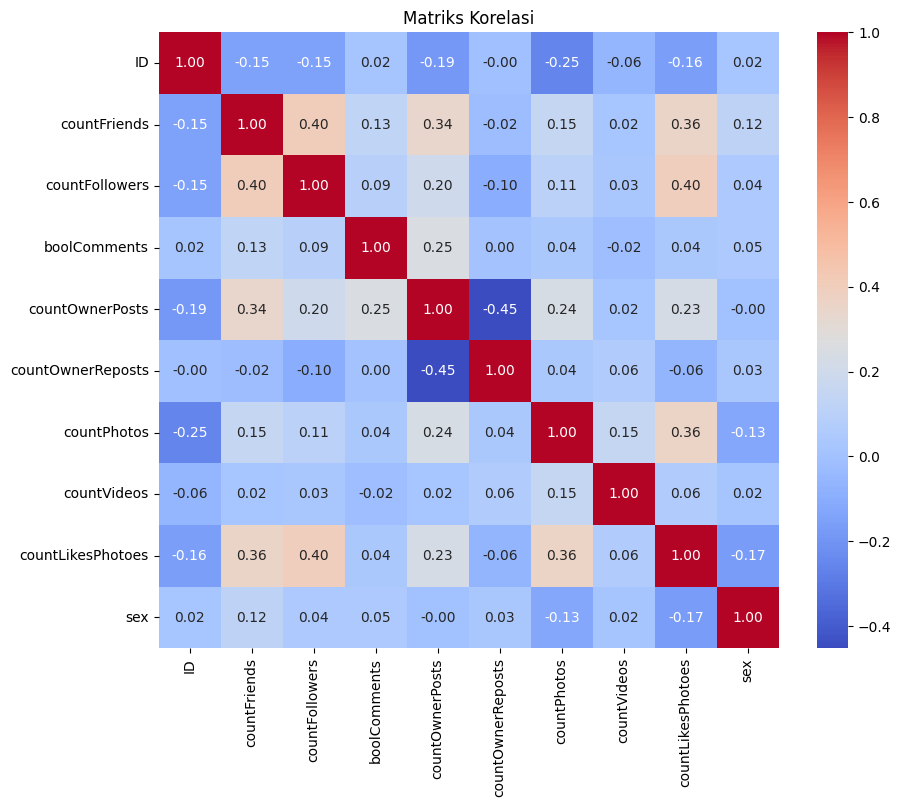

In [31]:
# Menampilkan matriks korelasi sebagai heatmap untuk variabel numerik
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

Berikut adalah interpretasi dari setiap item analisis yang dilakukan dalam kode:

1. **Informasi Jaringan**:
   - Jumlah node: Jumlah total entitas dalam jaringan.
   - Jumlah edge: Jumlah total koneksi antara entitas dalam jaringan.
   - Rata-rata derajat: Rata-rata jumlah koneksi yang dimiliki oleh setiap entitas dalam jaringan.
   - Komponen terhubung: Jumlah kelompok terpisah dari entitas yang terhubung satu sama lain dalam jaringan.

2. **Diameter Komponen Terbesar**:
   - Diameter adalah panjang terpanjang dari jalur terpendek antara dua entitas dalam jaringan. Diameter komponen terbesar adalah diameter dari kelompok terbesar entitas yang terhubung satu sama lain dalam jaringan. Ini mengukur seberapa jauh entitas yang paling terpisah dalam kelompok dapat terhubung satu sama lain.

3. **Centralitas**:
   - Derajat Sentralitas: Ukuran seberapa banyak entitas dihubungkan dengan entitas lain dalam jaringan. In-Degree Sentralitas mengukur jumlah koneksi masuk ke entitas, sementara Out-Degree Sentralitas mengukur jumlah koneksi keluar dari entitas.

4. **Komunitas Detection**:
   - Komunitas adalah kelompok entitas dalam jaringan yang memiliki koneksi yang lebih kuat di antara mereka daripada dengan entitas di luar kelompok. Deteksi komunitas bertujuan untuk mengidentifikasi kelompok-kelompok ini. Dalam kode ini, metode greedy modularity communities digunakan untuk menemukan komunitas.

5. **Kepatuhan Struktural**:
   - Triads adalah tiga node yang terhubung dalam jaringan. Triadic census menghitung distribusi dari semua kemungkinan kombinasi tiga node dalam jaringan berdasarkan kategori struktural tertentu.

6. **Matriks Korelasi**:
   - Matriks korelasi adalah representasi visual dari korelasi antara variabel numerik dalam dataset. Ini membantu dalam memahami hubungan antara berbagai atribut dalam dataset.

Setiap item analisis memberikan wawasan yang berbeda tentang struktur, hubungan, dan sifat jaringan. Dengan memahami analisis ini, Anda dapat lebih baik mengerti karakteristik jaringan yang sedang Anda teliti. Jika ada pertanyaan lebih lanjut tentang interpretasi atau analisis tertentu, jangan ragu untuk bertanya!